1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing

2. Load the dataset

In [2]:
data = pd.read_csv('water_potability.csv')

data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


3. Clean the data
4. Check for missing values

In [3]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

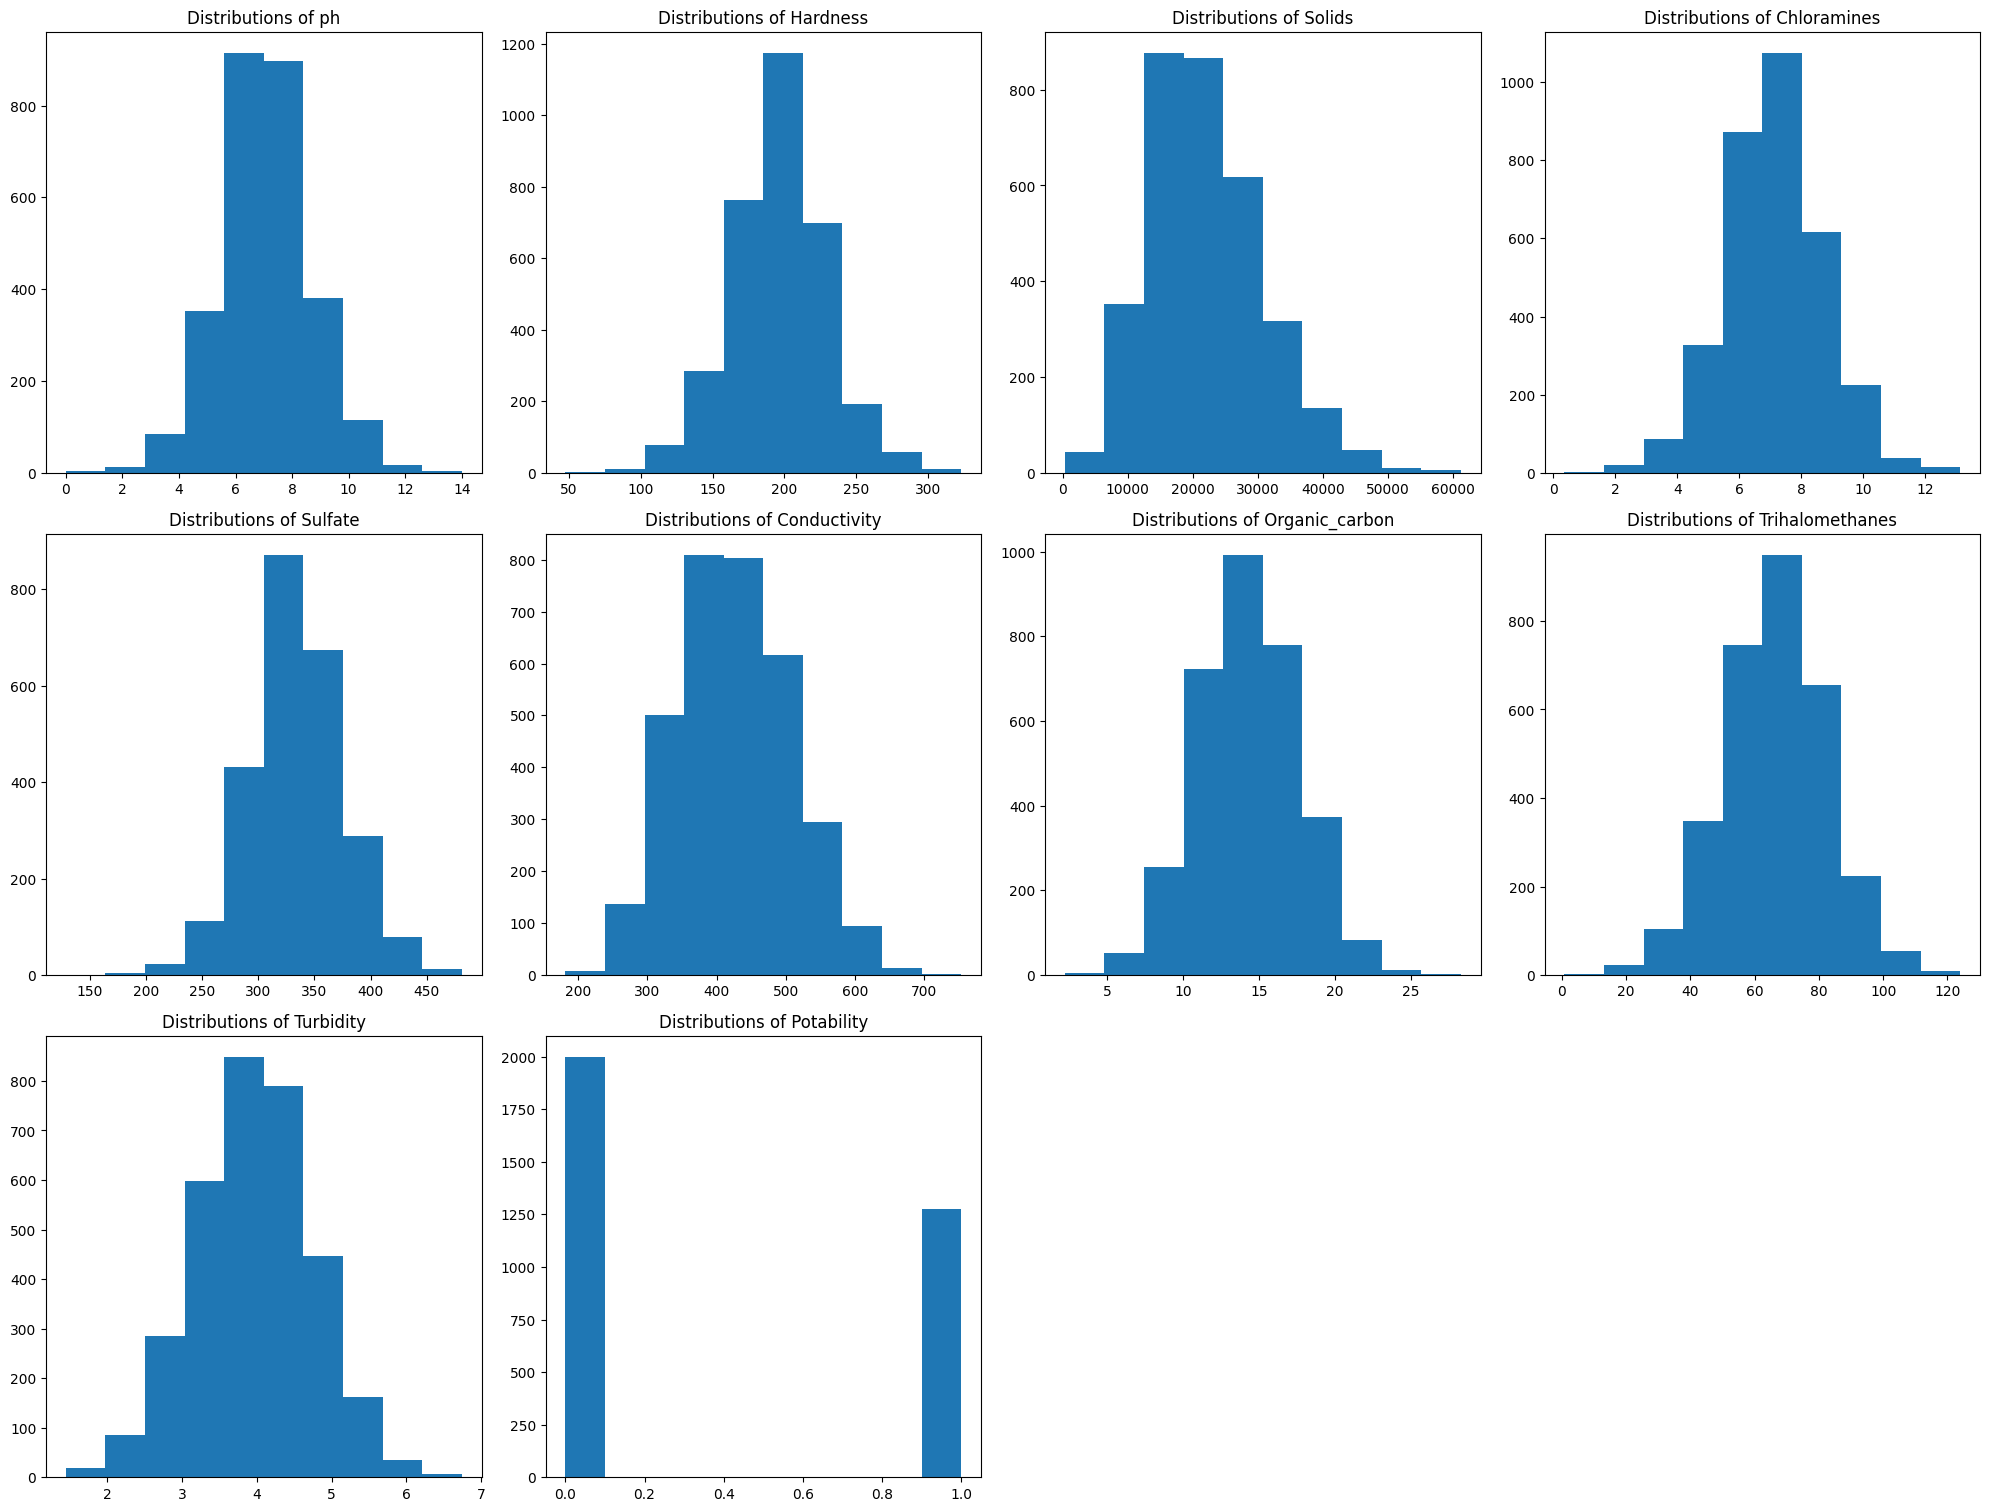

In [4]:
import matplotlib.pyplot as plt
cont_data = data.select_dtypes(exclude = 'object')
def plothisto(cont_data):
    plt.figure(figsize = (20,20))
    for i, col in enumerate(cont_data.columns):
        plt.subplot(4,4, i+1)
        plt.hist(data[col])
        plt.title(f"Distributions of {col}")
    plt.tight_layout()
    plt.show()

plothisto(cont_data)

6. Fill in the missing values
7. Normal Distribution with mean()
8. Skewed distribution with median()

In [5]:
data["ph"]= data["ph"].fillna(data["ph"].mean())
data["Sulfate"]= data["Sulfate"].fillna(data["Sulfate"].mean())
data["Trihalomethanes"]= data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean())

9. Check for missing values again

In [6]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

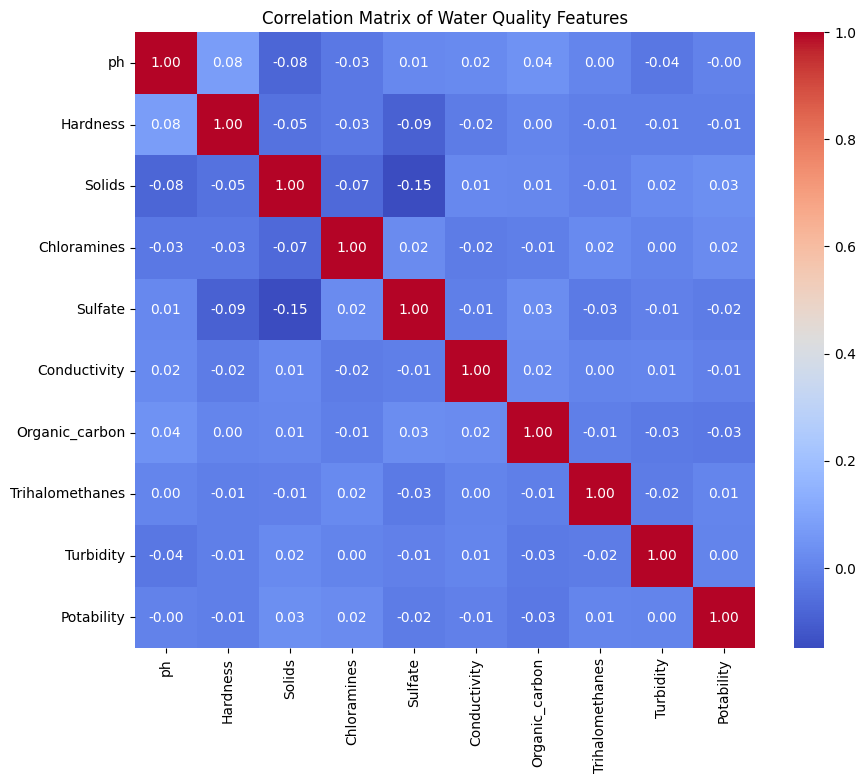

In [7]:
import seaborn as sns
correlation_matrix = data.corr()
print(correlation_matrix)

print("\nCorrelation with Potability:\n")
print(correlation_matrix['Potability'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Quality Features')
plt.show()

In [8]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


10. After cleaning, split the dataset but first check the features you have

In [9]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

11. Split the dataset

In [10]:
X = data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity' ]]
y = data['Potability']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
data.select_dtypes

<bound method DataFrame.select_dtypes of             ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970  

12. Build the model

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

13. Evaluate the model

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report for Decision Tree Classifier:\n", class_report)


Accuracy: 0.5823170731707317

Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       412
           1       0.44      0.49      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.59       656



In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print("Accuracy for RandomForestClassifier:", accuracy)
print("\nClassification Report for RandomForestClassifier:\n", classif)

Accuracy for RandomForestClassifier: 0.6707317073170732

Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.69      0.86      0.77       412
           1       0.60      0.34      0.44       244

    accuracy                           0.67       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.66      0.67      0.64       656



In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print("Accuracy for KNN:", accuracy)
print("\nClassification Report for KNN:\n", classif)

Accuracy for KNN: 0.5411585365853658

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.62      0.72      0.66       412
           1       0.34      0.25      0.29       244

    accuracy                           0.54       656
   macro avg       0.48      0.48      0.47       656
weighted avg       0.51      0.54      0.52       656



In [20]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print("Accuracy for SVC:", accuracy)
print("\nClassification Report for SVC:\n", classif)

Accuracy for SVC: 0.6280487804878049

Classification Report for SVC:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print("Accuracy for Logistic Regression:", accuracy)
print("\nClassification Report for Logistic Regression:\n", classif)

Accuracy for Logistic Regression: 0.6280487804878049

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\JAMES\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
clf = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_split = 10,
    min_samples_leaf = 5,
    criterion = 'gini'
)

In [26]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)

In [28]:
print(f"Accuracy: {accuracy}")
print(f" Classification: {classif}")

Accuracy: 0.6341463414634146
 Classification:               precision    recall  f1-score   support

           0       0.66      0.88      0.75       412
           1       0.52      0.22      0.31       244

    accuracy                           0.63       656
   macro avg       0.59      0.55      0.53       656
weighted avg       0.61      0.63      0.59       656



Hyper parameter tuning

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini','entropy']
}

grid_search = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 42),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 5,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("The Best Hyperparameters:", best_params)
print("The Best Cross-Validation Score :", best_score)

The Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
The Best Cross-Validation Score : 0.665267175572519


In [30]:
clf = RandomForestClassifier(
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 1,
    criterion = 'gini'
)

In [31]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
classif = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f" Classification: {classif}")

Accuracy: 0.6829268292682927
 Classification:               precision    recall  f1-score   support

           0       0.68      0.93      0.79       412
           1       0.70      0.26      0.38       244

    accuracy                           0.68       656
   macro avg       0.69      0.60      0.58       656
weighted avg       0.69      0.68      0.64       656



Since none gave a satisfactory accuracy score, feature engineering was carried out